In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:

# Load the dataset
data = pd.read_csv("BostonHousing_edit.csv")


In [61]:
# Glimpse of the dataset
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


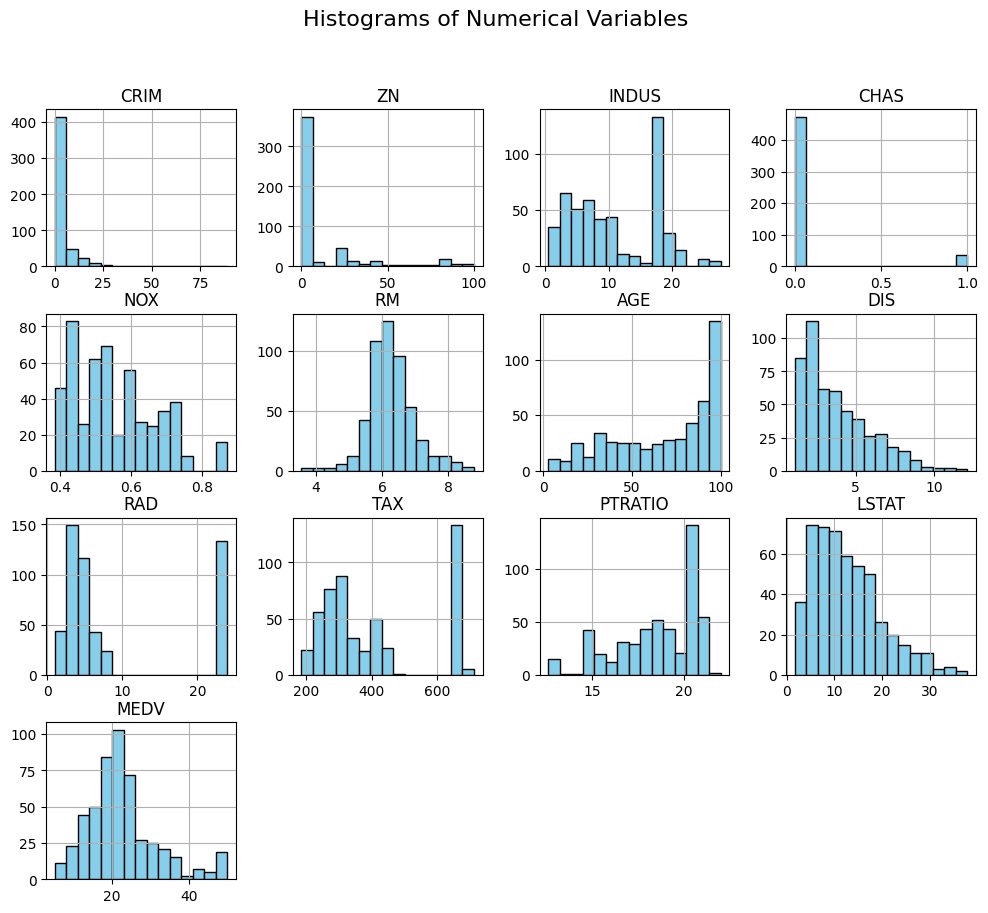

In [62]:
# Step 1: Exploratory Data Analysis (EDA)
# Histogram of numerical variables
data.hist(figsize=(12, 10), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()



In [63]:
# Step 2: Data Preprocessing
# Create a new variable by taking the square root of "CRIM"
# This is to reduce the skewness of the variable. This can be useful (but not mandatory) for linear regression models.
data["CRIM_SQRT"] = np.sqrt(data["CRIM"])
data.drop(columns=["CRIM"], inplace=True)


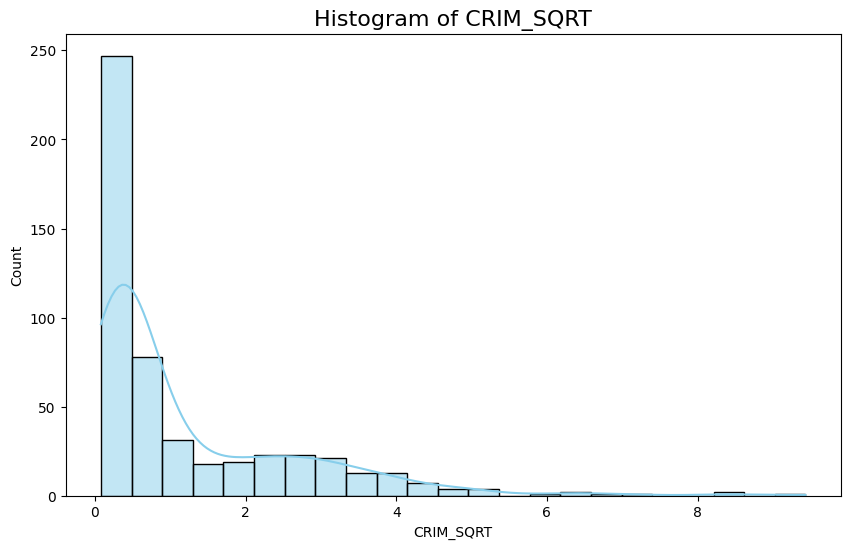

In [64]:
# check the skewness of the variable "CRIM_SQRT" using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data["CRIM_SQRT"], kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of CRIM_SQRT", fontsize=16)
plt.show()


In [65]:
# Check for missing values
print(data.isnull().sum())

ZN           0
INDUS        0
CHAS         0
NOX          0
RM           1
AGE          0
DIS          2
RAD          0
TAX          0
PTRATIO      1
LSTAT        0
MEDV         1
CRIM_SQRT    0
dtype: int64


In [4]:
# Handle missing values
# Option 1: Drop missing values
data.dropna(inplace=True)

# Option 2: Impute missing values
# data.fillna(data.mean(), inplace=True)

In [5]:
# Check duplicates
print(data.duplicated().sum())

#Remove duplicates
data.drop_duplicates(inplace=True)


3


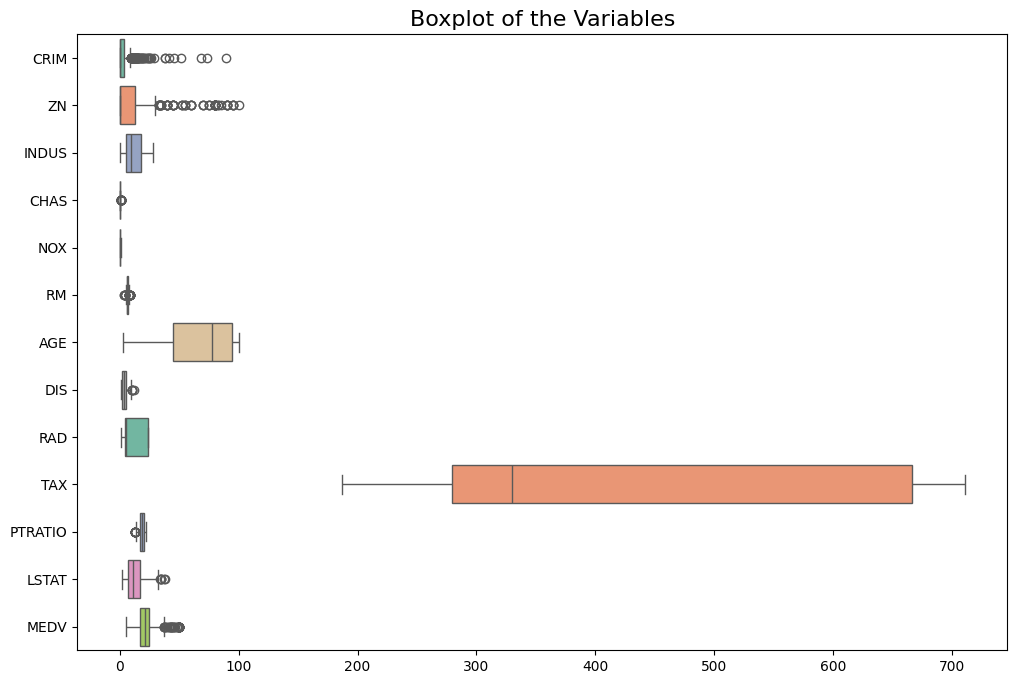

In [6]:
# Check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title("Boxplot of the Variables", fontsize=16)
plt.show()

# It is not mandatory to remove outliers. 
# However, it is recommended to remove outliers if they are due to data entry errors.

In [20]:
# Check the descriptive statistics of the variables
print(data.describe().T)


         count        mean         std        min        25%        50%  \
CRIM     501.0    3.642873    8.638933    0.00632    0.08221    0.25915   
ZN       501.0   11.307385   23.183945    0.00000    0.00000    0.00000   
INDUS    501.0   11.165948    6.858847    0.46000    5.19000    9.69000   
CHAS     501.0    0.069860    0.255166    0.00000    0.00000    0.00000   
NOX      501.0    0.554544    0.115382    0.38500    0.44900    0.53800   
RM       501.0    6.287573    0.703285    3.56100    5.88500    6.20900   
AGE      501.0   68.544311   28.175300    2.90000   45.00000   77.30000   
DIS      501.0    3.791440    2.098262    1.12960    2.10000    3.19920   
RAD      501.0    9.602794    8.733379    1.00000    4.00000    5.00000   
TAX      501.0  408.912176  169.184184  187.00000  279.00000  330.00000   
PTRATIO  501.0   18.459082    2.161292   12.60000   17.40000   19.10000   
LSTAT    501.0   12.635030    7.129015    1.73000    6.93000   11.34000   
MEDV     501.0   22.55548

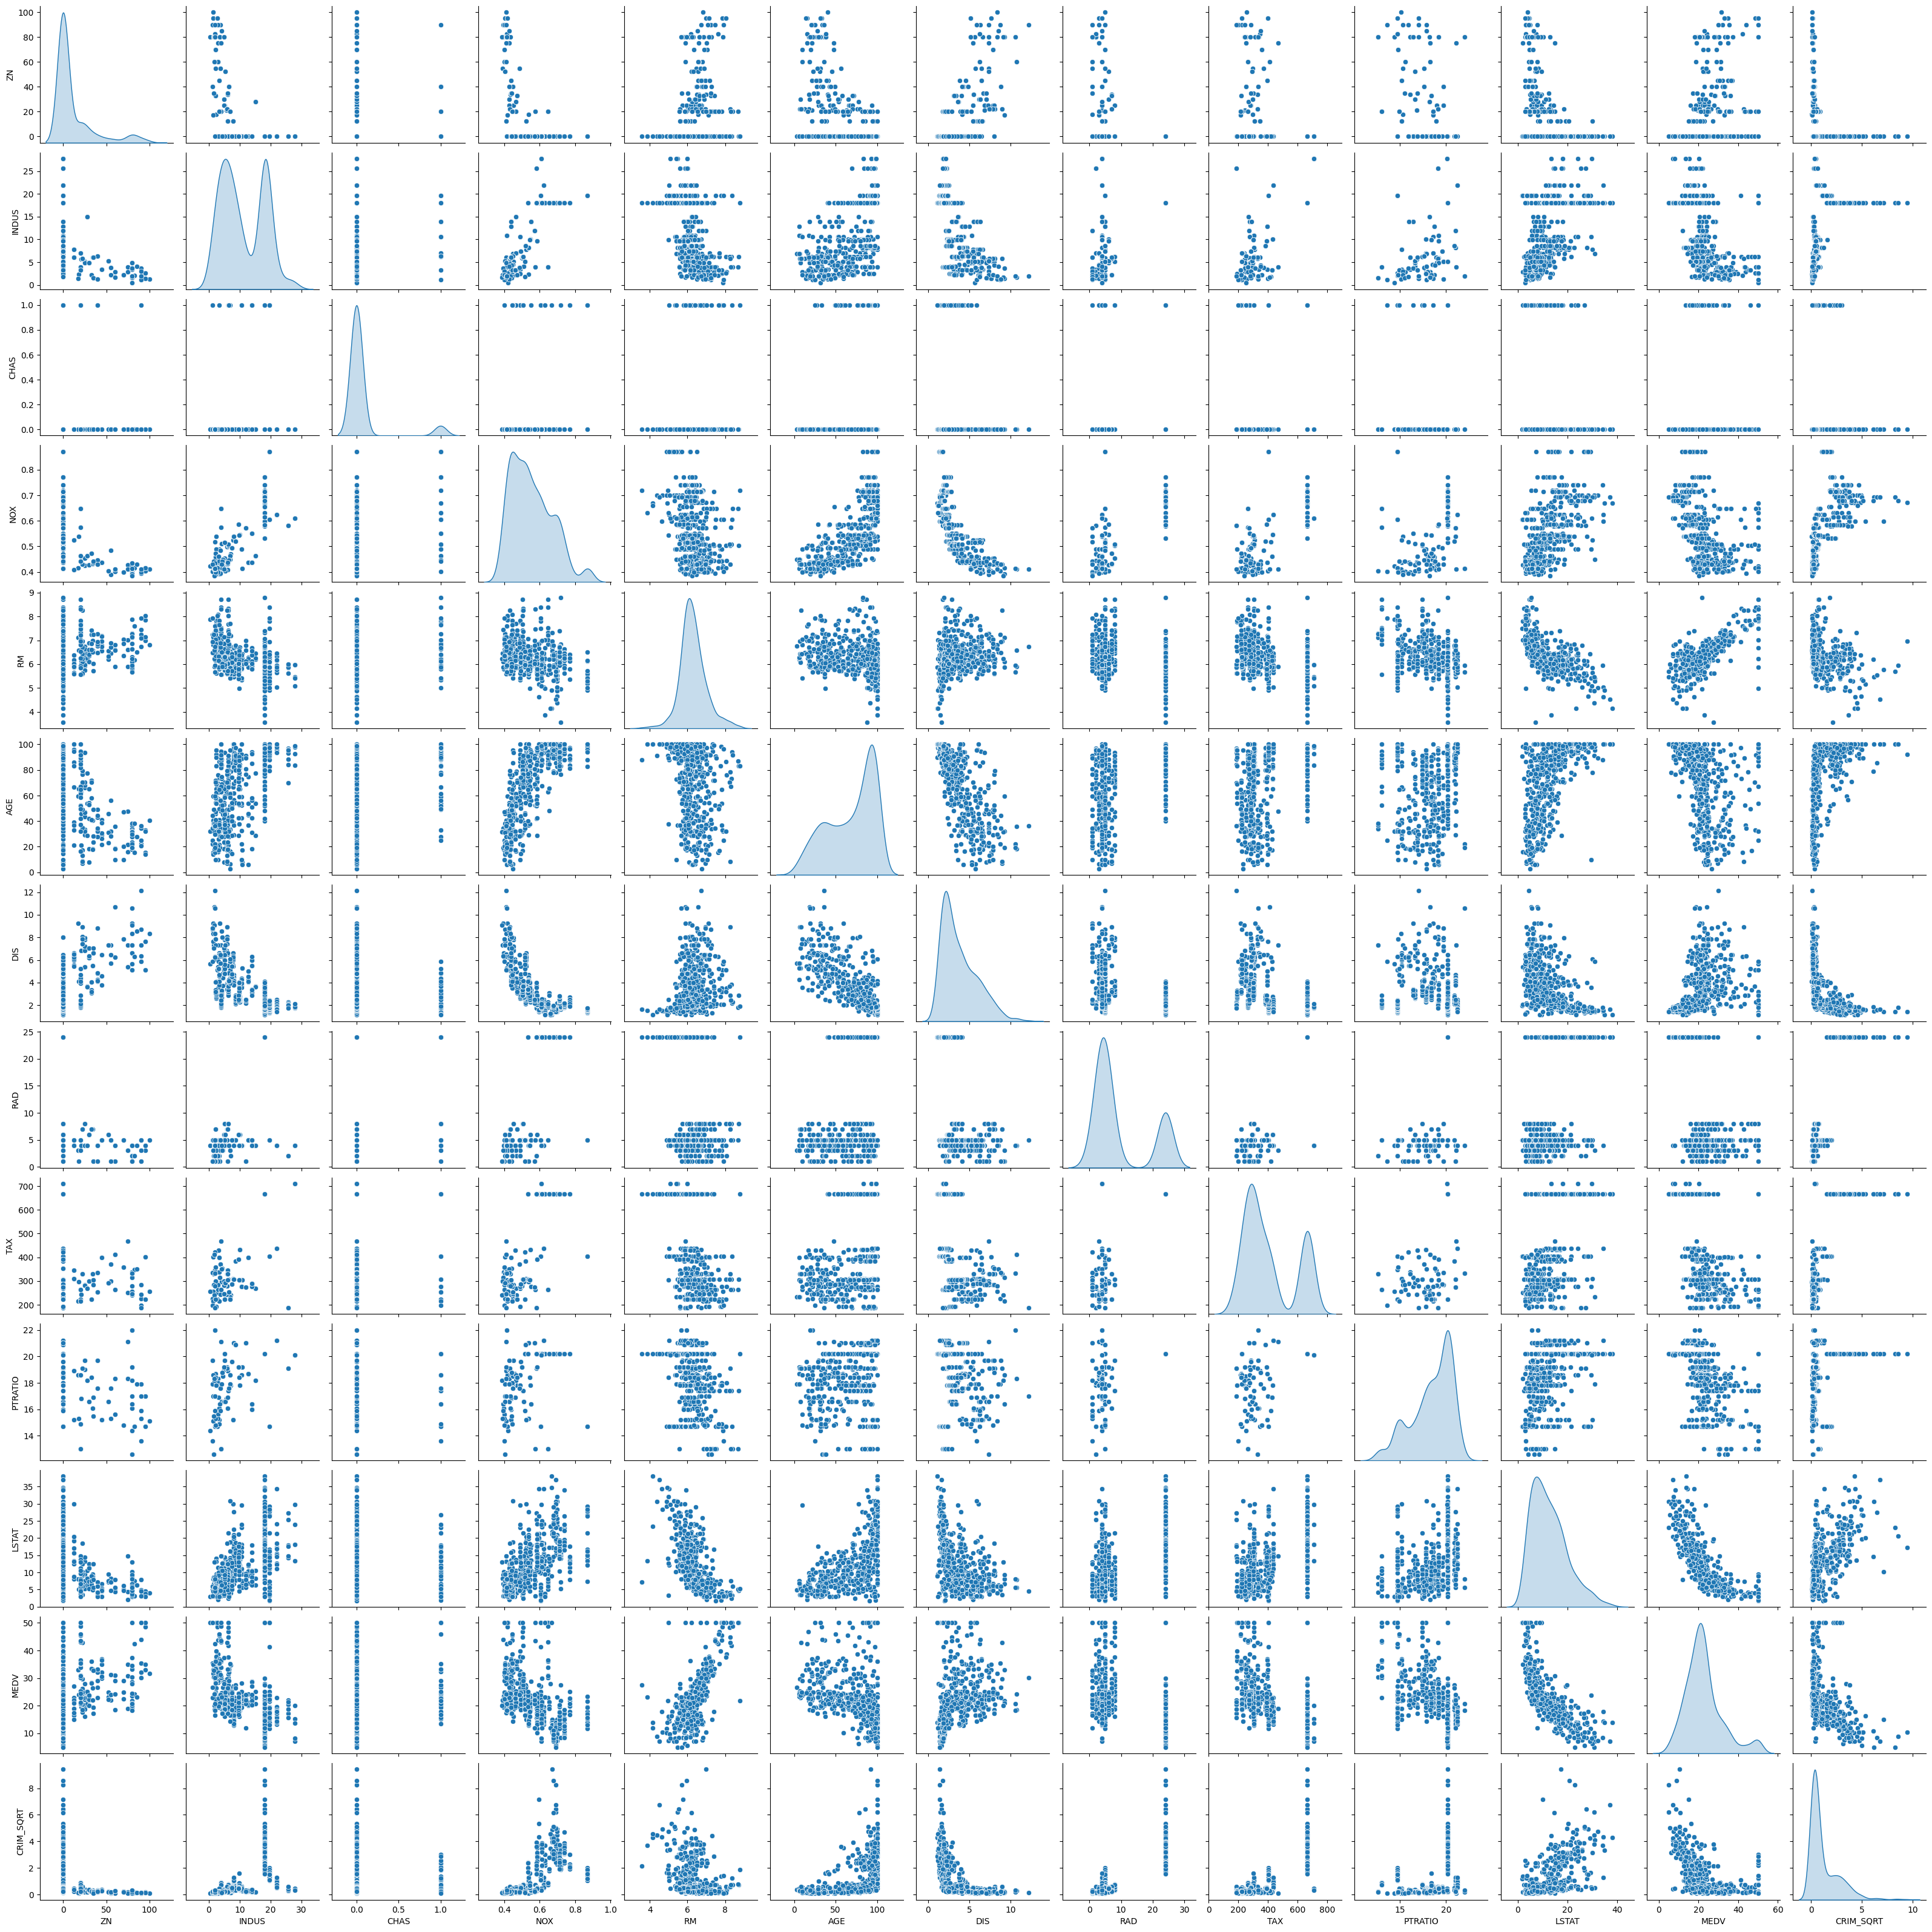

In [70]:
# Pairwise scatter plots
sns.pairplot(data, diag_kind='kde')
# diag_kind='kde' will display the density plot of the variable on the diagonal.
plt.show()


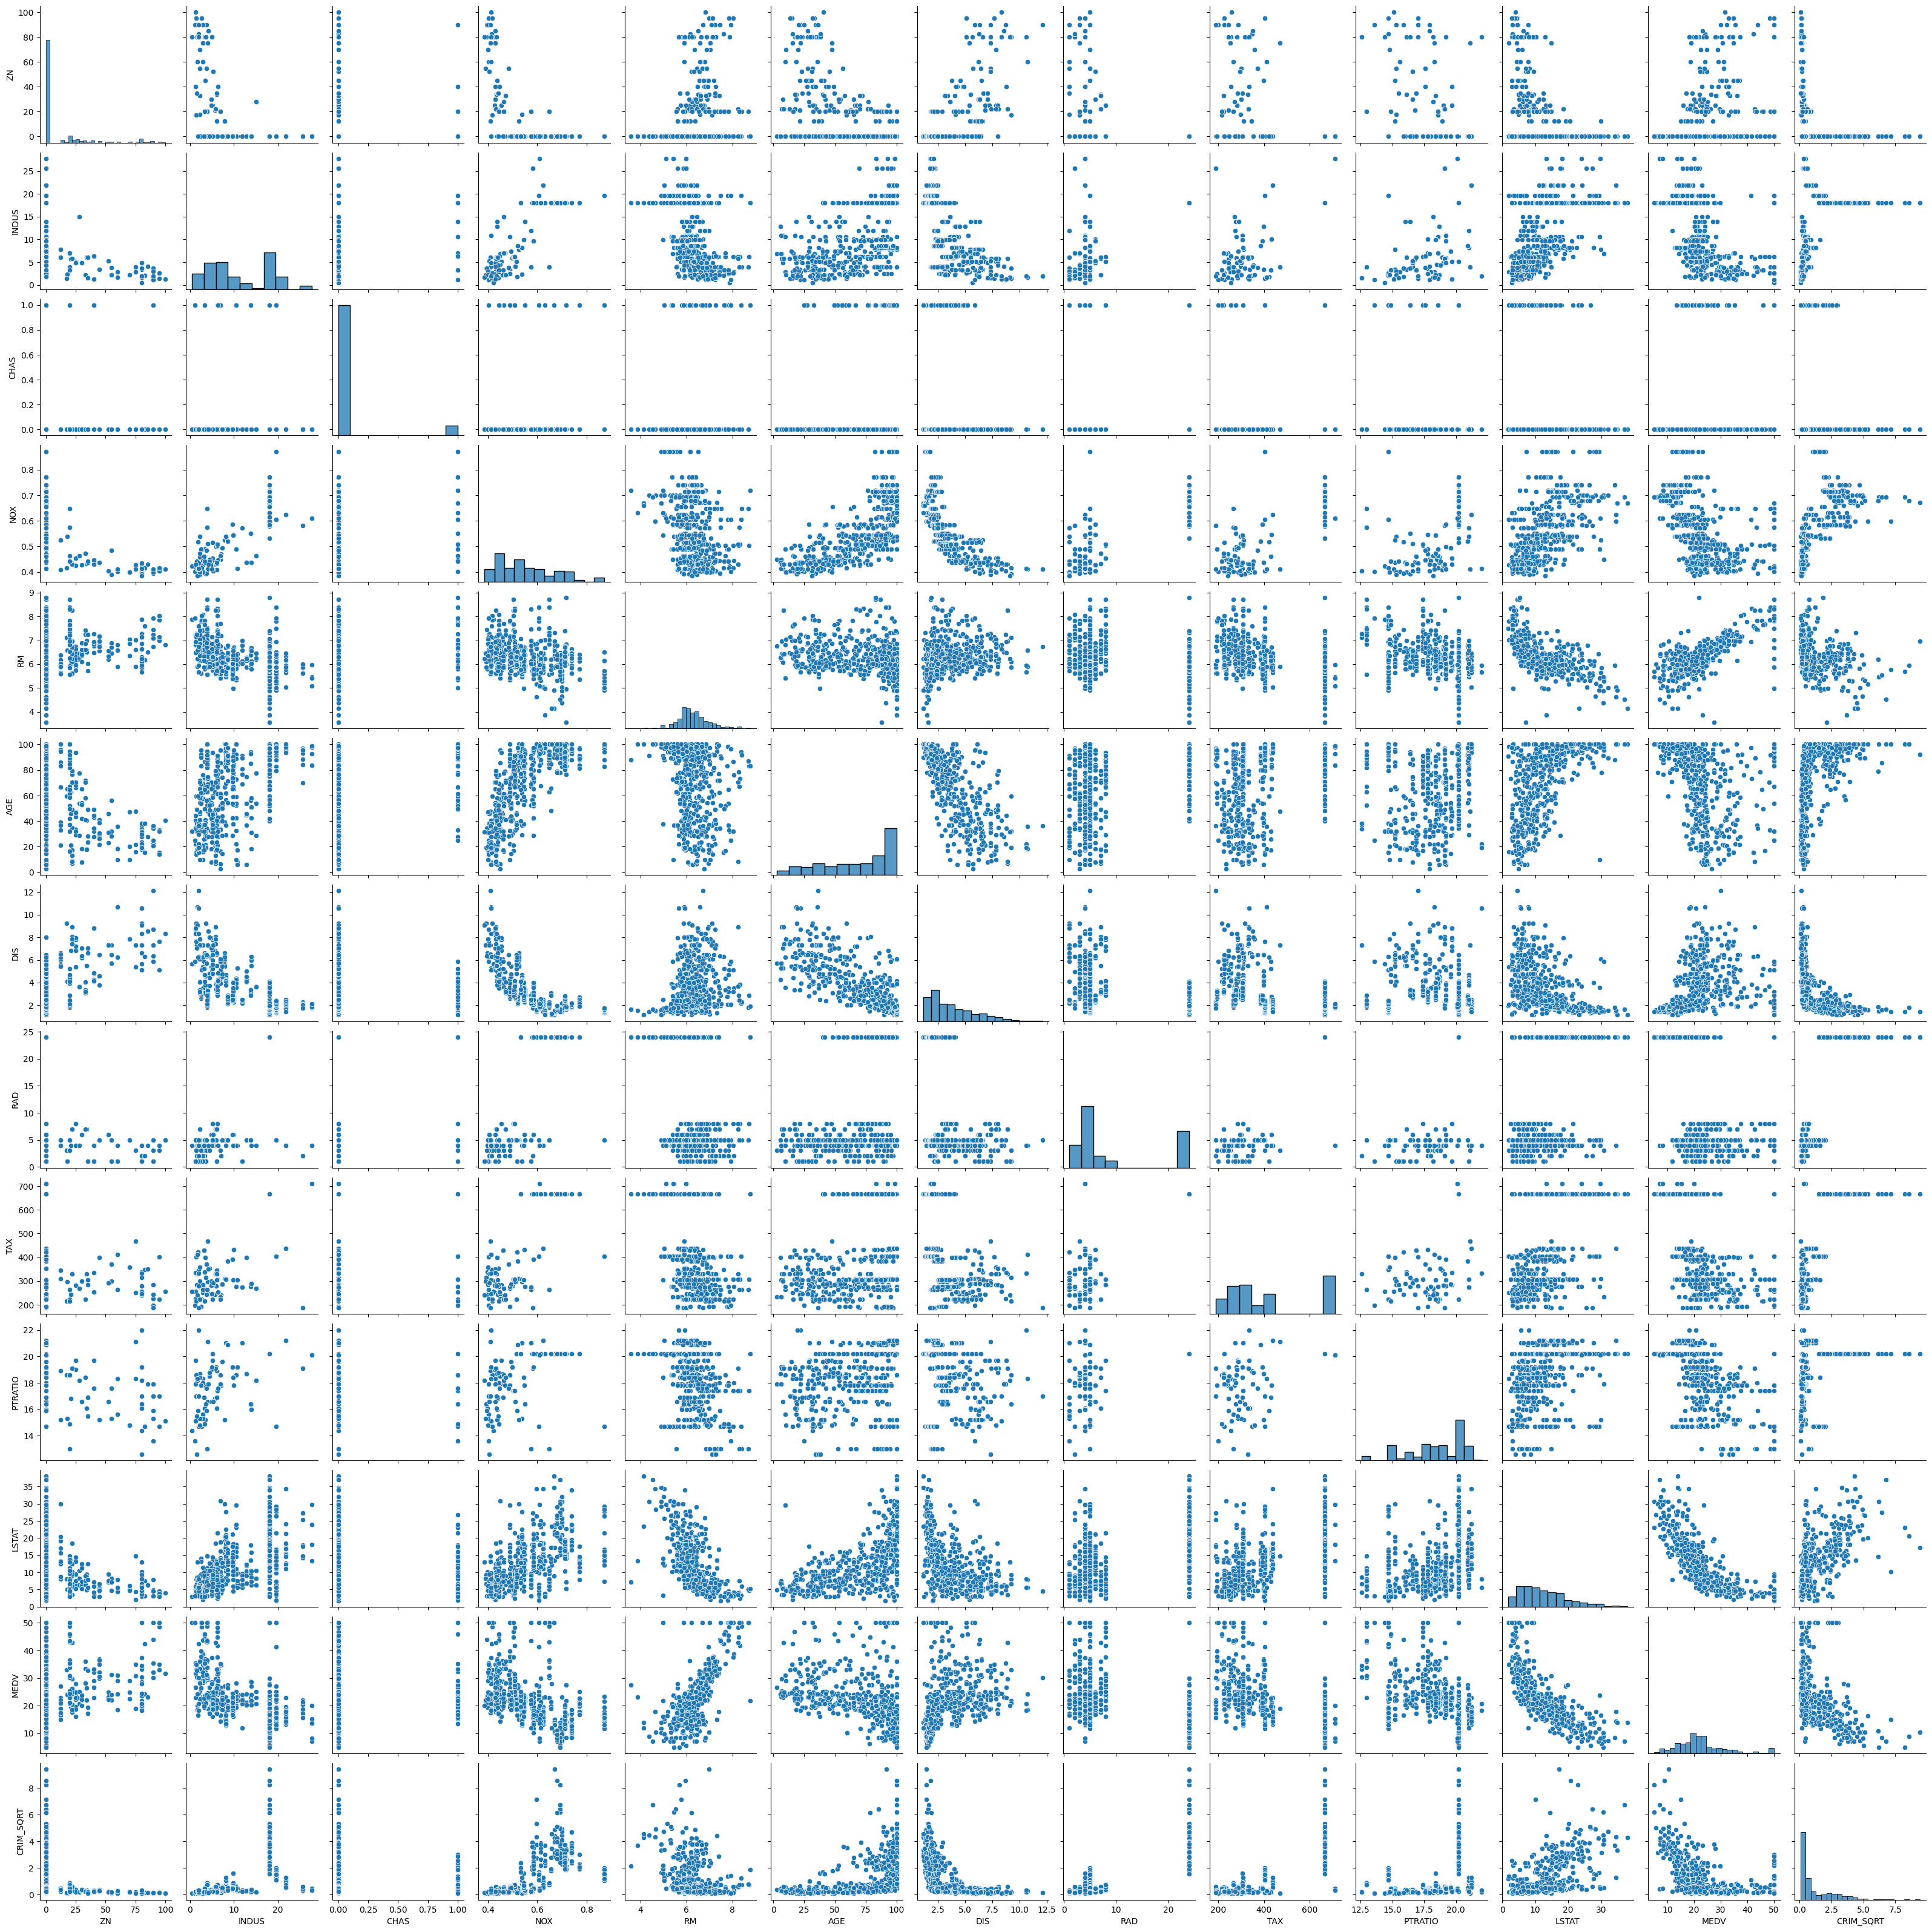

In [71]:
# Pairwise histograms
sns.pairplot(data, diag_kind='hist')
# diag_kind='hist' will display the histogram of the variable on the diagonal.
plt.show()

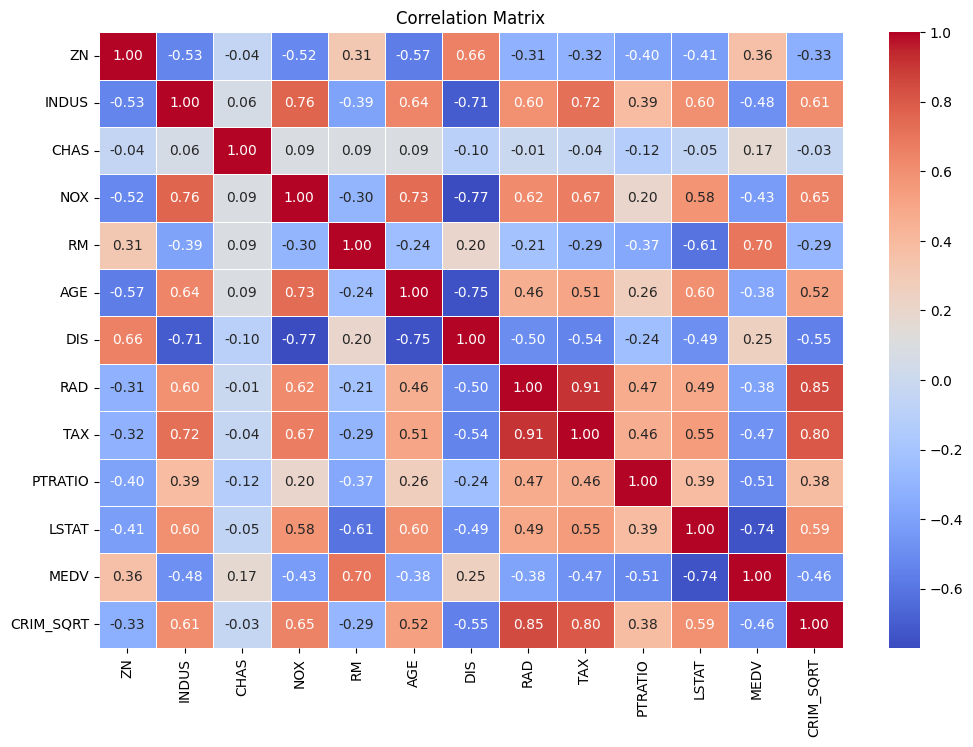

In [72]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:

# Step 3: Build Multiple Linear Regression Model
X = data.drop(columns=["MEDV"])  # Independent variables
y = data["MEDV"]  # Dependent variable


In [8]:

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant for intercept in statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


In [9]:
# Fit the regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     87.24
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          4.45e-102
Time:                        23:37:46   Log-Likelihood:                -1200.2
No. Observations:                 400   AIC:                             2426.
Df Residuals:                     387   BIC:                             2478.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9320      5.631      6.736      0.0

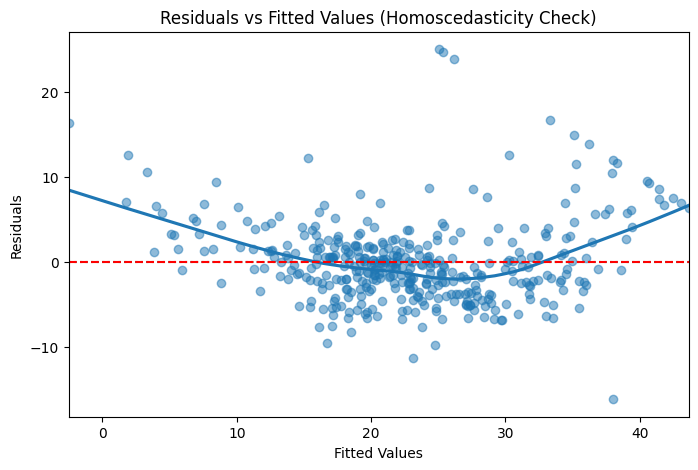

In [10]:
# Step 4: Check Assumptions

# 1. Homoscedasticity Check
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, scatter_kws={"alpha": 0.5})
plt.axhline(0, linestyle="--", color="red")
plt.title("Residuals vs Fitted Values (Homoscedasticity Check)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


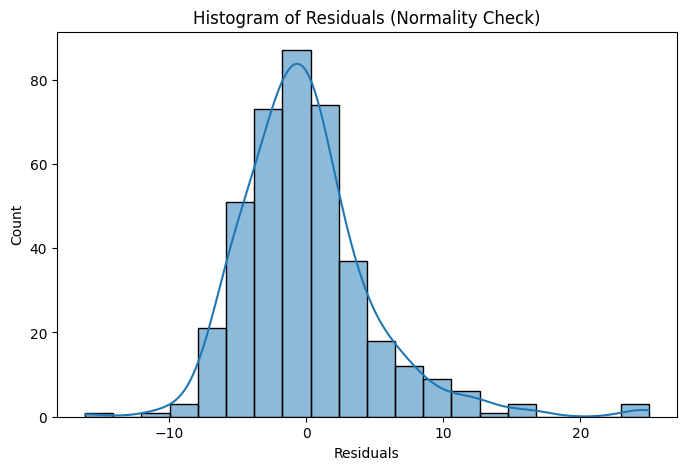

In [11]:
# 2. Normality of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(model.resid, bins=20, kde=True)
plt.title("Histogram of Residuals (Normality Check)")
plt.xlabel("Residuals")
plt.show()


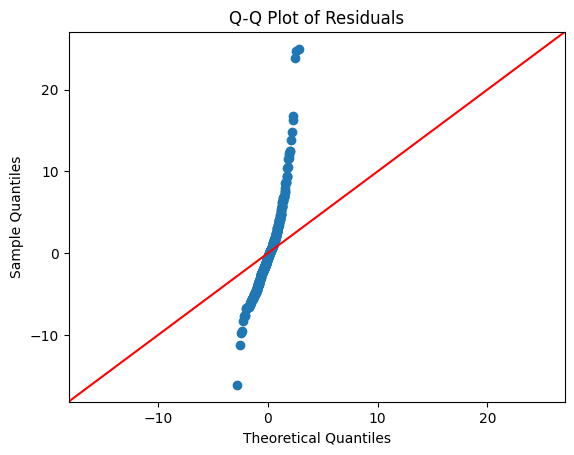

In [12]:

sm.qqplot(model.resid, line="45")
plt.title("Q-Q Plot of Residuals")
plt.show()


In [13]:

# 3. Multicollinearity Check
vif = pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]  # Calculate VIF
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

   Features     VIF
0     const  518.99
10      TAX    9.90
9       RAD    8.33
5       NOX    4.33
8       DIS    3.91
3     INDUS    3.77
7       AGE    3.23
12    LSTAT    2.88
2        ZN    2.28
6        RM    1.90
1      CRIM    1.87
11  PTRATIO    1.80
4      CHAS    1.06


In [14]:
# Remove the variable with the highest VIF
X_train_sm.drop(columns=["TAX"], inplace=True)

# Fit the regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     92.70
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          2.51e-101
Time:                        23:37:58   Log-Likelihood:                -1204.4
No. Observations:                 400   AIC:                             2433.
Df Residuals:                     388   BIC:                             2481.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5819      5.663      6.459      0.0

In [15]:

# Check again about Multicollinearity
vif = pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]  # Calculate VIF
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

   Features     VIF
0     const  515.35
5       NOX    4.25
8       DIS    3.91
7       AGE    3.22
3     INDUS    3.21
11    LSTAT    2.87
9       RAD    2.81
2        ZN    2.17
6        RM    1.89
1      CRIM    1.87
10  PTRATIO    1.78
4      CHAS    1.05


In [16]:

# Step 5: Model Evaluation on Test Data
# Remove the variable "TAX" from the test data
X_test_sm.drop(columns=["TAX"], inplace=True)
y_pred = model.predict(X_test_sm)


In [17]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R²: {r2:.2f}")


Test MSE: 19.95
Test R²: 0.72


The test R2 is similar to the train R2. There is no concern on overfitting.

In [19]:
print(f"Variance of y_test: {np.var(y_test):.2f}")
# Checking futher reference from Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")


Variance of y_test: 72.11
RMSE: 4.47


This means that on average, predictions are off by $4,470, which might be acceptable or not, depending on context.

#### Forward selection 

It is a stepwise regression technique where:

We start with no predictors (only the intercept).
At each step, we add the predictor that improves the model the most (lowest p-value in OLS or highest adjusted R²).
The process stops when no significant improvement is observed.


In [85]:
# Forward Selection method


# Define Forward Selection function
def forward_selection(X, y, significance_level=0.05):
    initial_features = []  # Start with an empty set of predictors
    remaining_features = list(X.columns)  # All available features
    best_features = []
    
    while remaining_features:
        scores = {}
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            scores[feature] = model.pvalues[feature]  # Store p-values
        
        # Select the feature with the lowest p-value
        best_feature = min(scores, key=scores.get)
        
        # If p-value < significance level, keep the feature
        if scores[best_feature] < significance_level:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features.append(best_feature)
            print(f"Added {best_feature} with p-value {scores[best_feature]:.4f}")
        else:
            break  # Stop if no feature has a significant p-value
    
    return best_features


In [86]:

# Run forward selection on training data
selected_features = forward_selection(X_train, y_train)
print("\nFinal selected features:", selected_features)

# Train final model using selected features
X_train_selected = sm.add_constant(X_train[selected_features])
X_test_selected = sm.add_constant(X_test[selected_features])

final_model = sm.OLS(y_train, X_train_selected).fit()
print("\nFinal Model Summary:")
print(final_model.summary())


Added LSTAT with p-value 0.0000
Added RM with p-value 0.0000
Added PTRATIO with p-value 0.0000
Added DIS with p-value 0.0000
Added NOX with p-value 0.0000
Added CHAS with p-value 0.0075

Final selected features: ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS']

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.17e-103
Time:                        23:12:13   Log-Likelihood:                -1211.6
No. Observations:                 400   AIC:                             2437.
Df Residuals:                     393   BIC:                             2465.
Df Model:                           6                                         
Covari

#### Backward elimination 

It is a stepwise regression technique where:

We start with all predictors in the model.
At each step, we remove the predictor with the highest p-value (least significant).
The process stops when all remaining variables are statistically significant (p-value < 0.05).

In [87]:
# Backward elimination function
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)  # Start with all features
    
    while len(features) > 0:
        model = sm.OLS(y, X[features]).fit()  # Fit the model with current features
        p_values = model.pvalues  # Get p-values of features
        worst_feature = p_values.idxmax()  # Feature with the highest p-value
        
        # If the highest p-value is above the threshold, remove that feature
        if p_values[worst_feature] > significance_level:
            features.remove(worst_feature)
            print(f"Removed {worst_feature} with p-value {p_values[worst_feature]:.4f}")
        else:
            break  # Stop if all p-values are below significance level

    return features

# Run backward elimination on training data
selected_features = backward_elimination(X_train, y_train)
print("\nFinal selected features:", selected_features)

# Train final model using selected features
X_train_selected = sm.add_constant(X_train[selected_features])
X_test_selected = sm.add_constant(X_test[selected_features])

final_model = sm.OLS(y_train, X_train_selected).fit()
print("\nFinal Model Summary:")
print(final_model.summary())


Removed INDUS with p-value 0.9179
Removed NOX with p-value 0.7735
Removed AGE with p-value 0.3364
Removed RAD with p-value 0.0904
Removed CRIM_SQRT with p-value 0.1787
Removed PTRATIO with p-value 0.0738

Final selected features: ['ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'LSTAT']

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.25e-98
Time:                        23:15:40   Log-Likelihood:                -1224.0
No. Observations:                 400   AIC:                             2462.
Df Residuals:                     393   BIC:                             2490.
Df Model:                           6                                   

#### Stepwise selection 

It combines both forward and backward selection:
Starts with no predictors (or all predictors, depending on initialization).
Adds the best predictor at each step (like forward selection).
Removes the worst predictor if it becomes non-significant (like backward elimination).
Stops when no variables can be added or removed based on a chosen significance level.

In [88]:
# Stepwise selection function (Forward & Backward)
def stepwise_selection(X, y, significance_level=0.05):
    initial_features = []  # Start with an empty model
    remaining_features = list(X.columns)  # All available features
    best_features = []
    
    while remaining_features:
        changed = False
        
        # **Forward Selection: Add the best predictor**
        scores_with_candidates = {}
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            scores_with_candidates[feature] = model.pvalues[feature]
        
        best_feature = min(scores_with_candidates, key=scores_with_candidates.get)
        if scores_with_candidates[best_feature] < significance_level:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features.append(best_feature)
            changed = True
            print(f"Added {best_feature} with p-value {scores_with_candidates[best_feature]:.4f}")
        
        # **Backward Elimination: Remove the worst predictor**
        model = sm.OLS(y, sm.add_constant(X[initial_features])).fit()
        p_values = model.pvalues.iloc[1:]  # Ignore the constant term
        worst_feature = p_values.idxmax()  # Feature with the highest p-value
        
        if p_values[worst_feature] > significance_level:
            initial_features.remove(worst_feature)
            best_features.remove(worst_feature)
            remaining_features.append(worst_feature)
            changed = True
            print(f"Removed {worst_feature} with p-value {p_values[worst_feature]:.4f}")
        
        if not changed:
            break  # Stop if no feature was added or removed
    
    return best_features

# Run stepwise selection on training data
selected_features = stepwise_selection(X_train, y_train)
print("\nFinal selected features:", selected_features)

# Train final model using selected features
X_train_selected = sm.add_constant(X_train[selected_features])
X_test_selected = sm.add_constant(X_test[selected_features])

final_model = sm.OLS(y_train, X_train_selected).fit()
print("\nFinal Model Summary:")
print(final_model.summary())


Added LSTAT with p-value 0.0000
Added RM with p-value 0.0000
Added PTRATIO with p-value 0.0000
Added DIS with p-value 0.0000
Added NOX with p-value 0.0000
Added CHAS with p-value 0.0075

Final selected features: ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS']

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.17e-103
Time:                        23:18:30   Log-Likelihood:                -1211.6
No. Observations:                 400   AIC:                             2437.
Df Residuals:                     393   BIC:                             2465.
Df Model:                           6                                         
Covari

#### Criteria-Based Feature Selection Using AIC & BIC 

Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are methods used to compare models by balancing goodness of fit and model complexity. They are particularly useful for selecting the best subset of predictors in regression.

Key Concepts
AIC (Akaike Information Criterion): Measures model fit while penalizing complexity. Lower AIC = better model.
BIC (Bayesian Information Criterion): Similar to AIC but penalizes complexity more strongly. Lower BIC = better model.
Stepwise Selection Using AIC/BIC:
Starts with all predictors or no predictors.
Iteratively adds or removes predictors to minimize AIC/BIC.
Stops when removing/adding features does not improve AIC/BIC.

In [89]:

# Stepwise selection function using AIC or BIC
def stepwise_aic_bic(X, y, criterion="AIC"):
    """
    Perform stepwise feature selection using AIC or BIC.

    Parameters:
        X: Independent variables (DataFrame)
        y: Target variable (Series)
        criterion: "AIC" or "BIC" (default: AIC)

    Returns:
        List of selected features
    """
    initial_features = []  # Start with an empty model
    remaining_features = list(X.columns)  # All available features
    best_features = []
    best_criterion_value = np.inf  # Initialize with a large value
    
    while remaining_features:
        changed = False
        
        # **Forward Selection: Add the best predictor**
        scores_with_candidates = {}
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            scores_with_candidates[feature] = model.aic if criterion == "AIC" else model.bic
        
        best_feature = min(scores_with_candidates, key=scores_with_candidates.get)
        
        if scores_with_candidates[best_feature] < best_criterion_value:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features.append(best_feature)
            best_criterion_value = scores_with_candidates[best_feature]
            changed = True
            print(f"Added {best_feature}, {criterion}: {best_criterion_value:.2f}")
        
        # **Backward Elimination: Remove the worst predictor**
        model = sm.OLS(y, sm.add_constant(X[initial_features])).fit()
        scores = model.aic if criterion == "AIC" else model.bic
        p_values = model.pvalues.iloc[1:]  # Ignore intercept
        worst_feature = p_values.idxmax()  # Feature with the highest p-value
        
        if p_values[worst_feature] > 0.05 and len(initial_features) > 1:
            initial_features.remove(worst_feature)
            best_features.remove(worst_feature)
            remaining_features.append(worst_feature)
            best_criterion_value = scores
            changed = True
            print(f"Removed {worst_feature}, {criterion}: {best_criterion_value:.2f}")
        
        if not changed:
            break  # Stop if no feature was added or removed

    return best_features

# Run stepwise selection using AIC
selected_features_aic = stepwise_aic_bic(X_train, y_train, criterion="AIC")
print("\nFinal selected features (AIC-based):", selected_features_aic)

# Run stepwise selection using BIC
selected_features_bic = stepwise_aic_bic(X_train, y_train, criterion="BIC")
print("\nFinal selected features (BIC-based):", selected_features_bic)

# Train final model using AIC-selected features
X_train_selected_aic = sm.add_constant(X_train[selected_features_aic])
X_test_selected_aic = sm.add_constant(X_test[selected_features_aic])

final_model_aic = sm.OLS(y_train, X_train_selected_aic).fit()
print("\nFinal Model Summary (AIC-selected features):")
print(final_model_aic.summary())

# Train final model using BIC-selected features
X_train_selected_bic = sm.add_constant(X_train[selected_features_bic])
X_test_selected_bic = sm.add_constant(X_test[selected_features_bic])

final_model_bic = sm.OLS(y_train, X_train_selected_bic).fit()
print("\nFinal Model Summary (BIC-selected features):")
print(final_model_bic.summary())


Added LSTAT, AIC: 2609.58
Added RM, AIC: 2513.33
Added PTRATIO, AIC: 2474.41
Added DIS, AIC: 2457.22
Added NOX, AIC: 2442.41
Added CHAS, AIC: 2437.11
Added ZN, AIC: 2435.48
Removed ZN, AIC: 2435.48

Final selected features (AIC-based): ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS']
Added LSTAT, BIC: 2617.56
Added RM, BIC: 2525.31
Added PTRATIO, BIC: 2490.38
Added DIS, BIC: 2477.17
Added NOX, BIC: 2466.36
Added CHAS, BIC: 2465.05

Final selected features (BIC-based): ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS']

Final Model Summary (AIC-selected features):
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.17e-103
Time:                        23:22:45

#### AIC vs BIC: When to Use Which?

AIC (Akaike) is best for prediction accuracy, as it has less strict penalization (keeps more features)  
BIC (Bayesian) is best for model simplicity, as it has more strict penalization (removes more features)  
If goal = better prediction, use AIC.  
If goal = simpler model, use BIC.  